In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline  

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat

In [2]:
import pathlib
import os


In [3]:

dir_path = pathlib.Path.cwd()
folder_path = dir_path / "data" 
file_name = "sugar-prices-historical-chart-data.csv"
df= pd.read_csv(os.path.join(folder_path, file_name),parse_dates=['date'],index_col='date')
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Abdelouaheb\\perso\\Ph\\Arima_model\\models\\data\\sugar-prices-historical-chart-data.csv'

In [23]:
# https://www.kaggle.com/code/jerryscientist/how-to-make-decision-using-arima-model
for dirname, _, filenames in os.walk(folder_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

c:\Abdelouaheb\perso\Ph\Arima_model\data\sugar-prices-historical-chart-data.csv
c:\Abdelouaheb\perso\Ph\Arima_model\data\web-traffic-time-series-forecasting.zip


In [58]:
import zipfile 
import pandas 
import os
for dirname, _, filenames in os.walk(folder_path):
    print(filenames)
    for filename in filenames:
        
        if 'sample_submission_2.csv' in filename:
            csv_filename = filename.split('.zip')[0]
            print(csv_filename)
            train_df = pd.read_csv(f'{os.path.join(dirname, filename)}', compression='zip')
            train_df = train_df.dropna()
        

['key_1.csv.zip', 'key_2.csv.zip', 'sample_submission_1.csv.zip', 'sample_submission_2.csv.zip', 'sugar-prices-historical-chart-data.csv', 'train_1.csv.zip', 'train_2.csv.zip', 'web-traffic-time-series-forecasting.zip']
sample_submission_2.csv


In [60]:
train_df

,Id,Visits
0,0b293039387a,0
1,7114389dd824,0
2,057b02ff1f09,0
3,bd2aca21caa3,0
4,c0effb42cdd5,0
...,...,...
8993901,f78fbaa305ad,0
8993902,33aecaf259d1,0
8993903,a36228b64466,0
8993904,26887d3e5c99,0


In [59]:
train_df = pd.melt(train_df[list(train_df.columns[-100:]) + ['Page']], id_vars='Page', var_name='date', value_name='Visits')

train_df['date'] = train_df['date'].astype('datetime64[ns]')

train_df['weekday'] = train_df['date'].apply(lambda x: x.weekday())

KeyError: "['Page'] not in index"

In [37]:
train_df

,Page,date,Visits,weekday
0,2NE1_zh.wikipedia.org_all-access_spider,2017-06-03,30.0,5
1,2PM_zh.wikipedia.org_all-access_spider,2017-06-03,31.0,5
2,3C_zh.wikipedia.org_all-access_spider,2017-06-03,4.0,5
3,4minute_zh.wikipedia.org_all-access_spider,2017-06-03,14.0,5
4,5566_zh.wikipedia.org_all-access_spider,2017-06-03,34.0,5
...,...,...,...,...
11508395,Chichén_Itzá_es.wikipedia.org_all-access_spider,2017-09-10,5.0,6
11508396,Fecundación_es.wikipedia.org_all-access_spider,2017-09-10,39.0,6
11508397,Gran_Hermano_VIP_(España)_es.wikipedia.org_all...,2017-09-10,7.0,6
11508398,Modelo_atómico_de_Thomson_es.wikipedia.org_all...,2017-09-10,26.0,6


In [53]:
#df = train_df.groupby(['date']).agg({'Visits':'sum'}).rename(columns={'Visits':'visit'}).reset_index()
df = train_df.groupby(['date']).agg({'Visits':'sum'}).rename(columns={'Visits':'visit'})
df

,visit
date,
2017-06-03,136225067.0
2017-06-04,142282024.0
2017-06-05,143974643.0
2017-06-06,142207379.0
2017-06-07,139789071.0
...,...
2017-09-06,150694182.0
2017-09-07,161337121.0
2017-09-08,122023529.0


In [43]:
import seaborn as sns

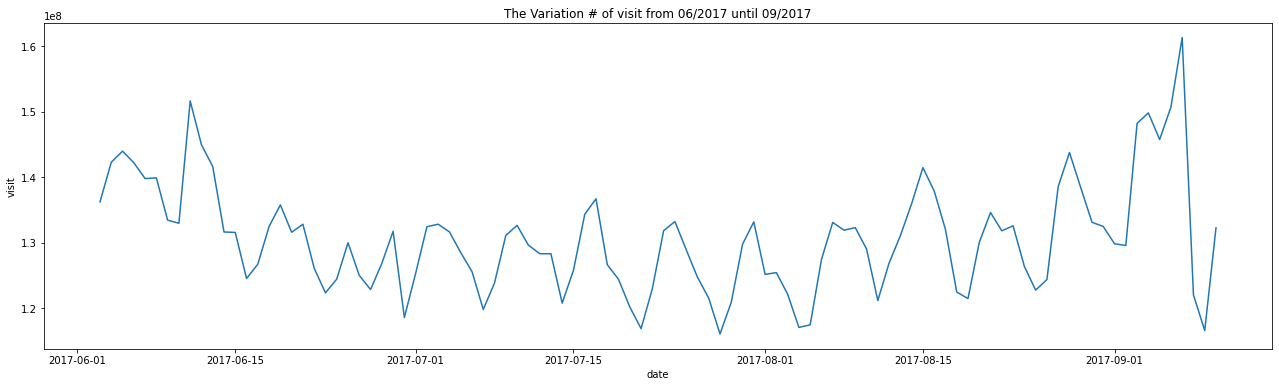

In [54]:
plt.figure(figsize=(22,6))
sns.lineplot(x=df.index, y=df['visit'])
plt.title('The Variation # of visit from 06/2017 until 09/2017')
plt.show()

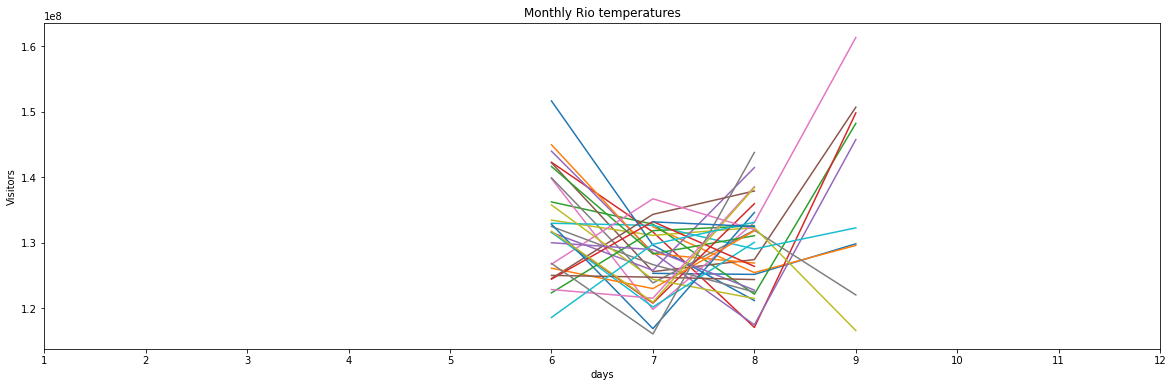

In [56]:
# i'm going to create a pivot table to plot the monthly temperatures through the years
df['day'] = df.index.day
df['month'] = df.index.month
pivot = pd.pivot_table(df, values='visit', index='month', columns='day', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Monthly Visitors ')
plt.xlabel('days')
plt.ylabel('Visitors')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

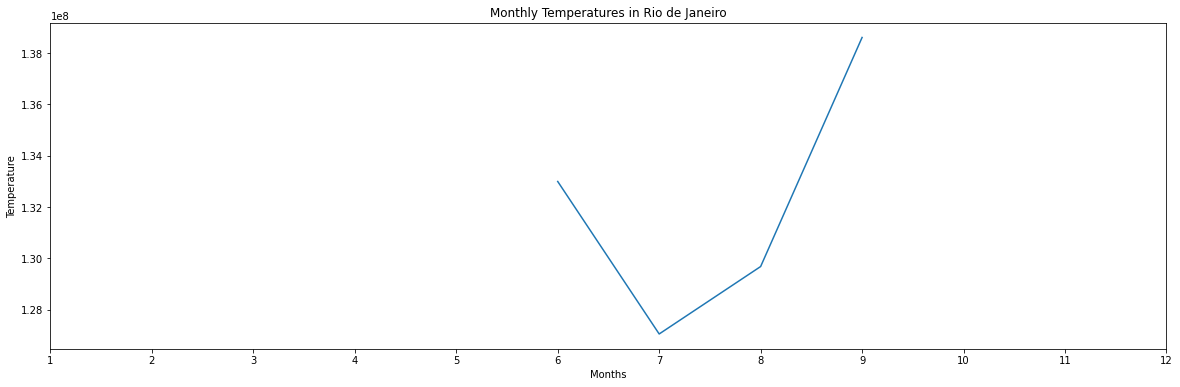

In [57]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures in Rio de Janeiro')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()